In [1]:
pip install tensorflow opencv-python

Note: you may need to restart the kernel to use updated packages.


Epoch 1/10
55/55 [==============================] - 51s 911ms/step - loss: 1613.0350 - val_loss: 360.9505
Epoch 2/10
55/55 [==============================] - 48s 878ms/step - loss: 229.7982 - val_loss: 138.9624
Epoch 3/10
55/55 [==============================] - 48s 879ms/step - loss: 87.2304 - val_loss: 56.5939
Epoch 4/10
55/55 [==============================] - 49s 889ms/step - loss: 29.0782 - val_loss: 22.0543
Epoch 5/10
55/55 [==============================] - 48s 879ms/step - loss: 13.4568 - val_loss: 14.5715
Epoch 6/10
55/55 [==============================] - 49s 897ms/step - loss: 6.2967 - val_loss: 7.4227
Epoch 7/10
55/55 [==============================] - 47s 863ms/step - loss: 4.4645 - val_loss: 5.7327
Epoch 8/10
55/55 [==============================] - 47s 849ms/step - loss: 2.9481 - val_loss: 4.1373
Epoch 9/10
55/55 [==============================] - 46s 845ms/step - loss: 2.5579 - val_loss: 6.3700
Epoch 10/10
18/18 [==============================] - 12s 688ms/step - loss: 

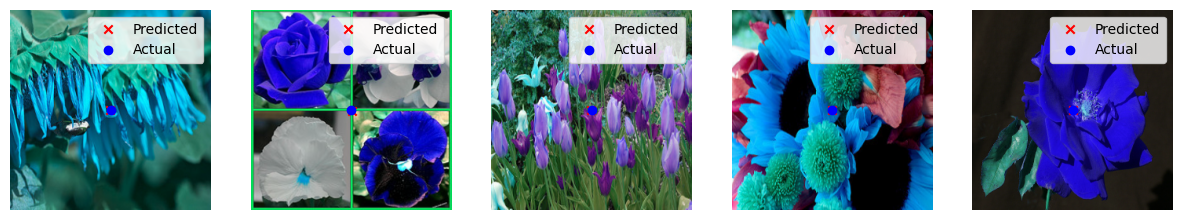

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess images
images = []
annotations = []

# Adjust the path based on your actual dataset location
dataset_path = "/kaggle/input/flowers-dataset"

# Loop through directories in the dataset path
for flower_class in os.listdir(os.path.join(dataset_path, 'train')):
    class_path = os.path.join(dataset_path, 'train', flower_class)
    
    # Check if the path is a directory
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            
            # Check if the path is a file and ends with a common image extension
            if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image = cv2.imread(image_path)
                image = cv2.resize(image, (256, 256))  # Resize to 256x256

                images.append(image)
                # Placeholder for annotation (center of the image)
                annotations.append((128, 128))  # Assuming the size is 256x256

images = np.array(images) / 255.0  # Normalize pixel values
annotations = np.array(annotations)

# Split the dataset into training, validation, and testing sets
train_images, test_images, train_annotations, test_annotations = train_test_split(
    images, annotations, test_size=0.2, random_state=42
)

# Building a simple model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='linear'))  # Output layer for (x, y) coordinates

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(train_images, train_annotations, epochs=10, validation_split=0.2)

# Save the model in the native Keras format
model.save("/kaggle/working/flowers_coordinate_model", save_format="tf")

# Load the saved model in the native Keras format
loaded_model = tf.keras.models.load_model("/kaggle/working/flowers_coordinate_model")

# Evaluate the model on the test set
test_loss = loaded_model.evaluate(test_images, test_annotations)
print("Test Loss:", test_loss)

# Make predictions on the test set
test_predictions = loaded_model.predict(test_images)

# Display a few examples
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(test_images[i])
    axes[i].scatter(*test_predictions[i], c='red', marker='x', label='Predicted')
    axes[i].scatter(*test_annotations[i], c='blue', marker='o', label='Actual')
    axes[i].legend()
    axes[i].axis("off")

plt.show()






